TIME SERIES FORECASTING PROJECT

In [1]:
#Multivariate project
#we need to create multivariate model and lstm
#with options to to give manual hyperparamter or selecting default value

#step 1 read data
#step 2 do basic data preprocessing
#step 3 then split data into train test
#step 4 train the model on training data with default or user input parameters
#step 5 evaluate model on test data
#rank the model based on the performance metrics

import pandas as pd
import numpy as np
import matplotlib as plt
#load datasets

df = pd.read_csv("M2SLMoneyStock.csv",index_col=0,parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv("PCEPersonalSpending.csv",index_col=0,parse_dates=True)
sp.index.freq = 'MS'

In [2]:
df = df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [3]:
df_temp = df.copy()

<Axes: xlabel='Date'>

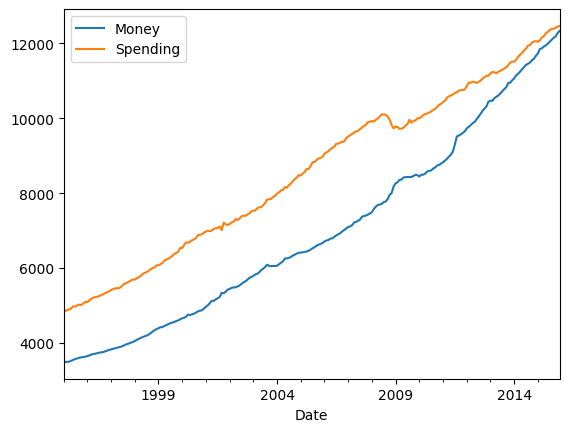

In [4]:
df.plot()

In [ ]:
df.describe()

,Money,Spending
count,252.000000,252.000000
mean,6978.151190,8562.311905
std,2554.325115,2231.933352
min,3489.900000,4850.800000
25%,4732.875000,6682.125000
50%,6507.400000,8777.150000
75%,8699.700000,10262.925000
max,12335.900000,12469.100000


Enter 1 ---> MEAN imputation
Enter 2 ---> LINEAR interpolation
2


<Axes: xlabel='Date'>

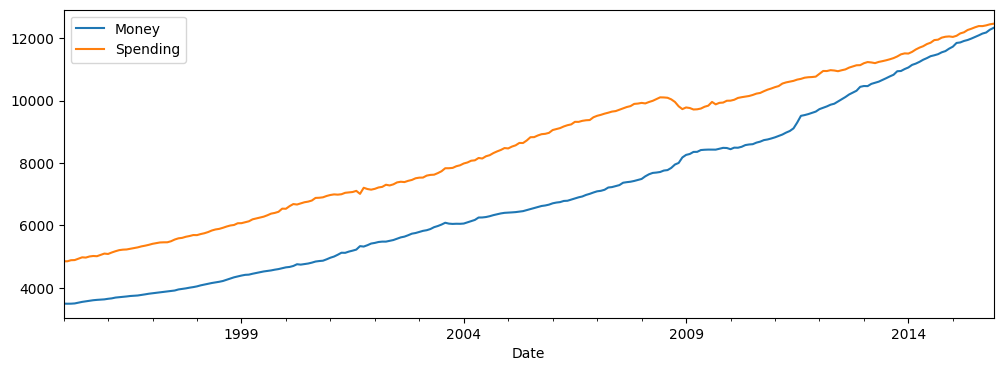

In [5]:
#filling missing values and plotting
import pandas as pd

def fill_missing_values(df, choice=1):
    if choice == 1:  # MEAN imputation
        df = df.fillna(df.mean())
    elif choice == 2:  # LINEAR interpolation
        df = df.interpolate(method='linear')
    return df

# Ask the user for their choice
choice = int(input('Enter 1 ---> MEAN imputation\nEnter 2 ---> LINEAR interpolation\n'))

# Fill missing values for all columns using the selected method
df = fill_missing_values(df, choice)

# You can now proceed with your data analysis or visualization as needed.
df.plot(figsize=(12, 4))


In [6]:
from statsmodels.tsa.stattools import adfuller


In [7]:
def stationarity_test(df, max_diff=5, significance_level=0.05):
    """
    df: Multivariate time series DataFrame
    max_diff: Maximum number of differencing to be applied
    significance_level: The significance level for the ADF test

    Returns stationary DataFrame and the number of differences applied.
    """
    diff_count = 0
    stationary = False

    while not stationary and diff_count <= max_diff:
        p_values = {}
        for col in df.columns:
            result = adfuller(df[col])
            p_value = result[1]
            p_values[col] = p_value
        print(p_values)
        max_p_value = max(p_values.values())

        if max_p_value <= significance_level:
            stationary = True
        else:
            df = df.diff().dropna()  # Difference the DataFrame
            diff_count += 1

    if not stationary:
        print("Warning: Data could not be made stationary with the given max_diff and significance_level.")

    return df, diff_count

# Perform stationarity detection and differencing
stationary_df, diff_count = stationarity_test(df)

# Print the final stationary DataFrame and the number of differences applied
print("Final Stationary DataFrame:")
print(stationary_df)
print(f"Number of Differences Applied: {diff_count}")

{'Money': 1.0, 'Spending': 0.9693009944428312}
{'Money': 0.26198379785112447, 'Spending': 2.0410272592129706e-10}
{'Money': 4.760674931295455e-10, 'Spending': 2.6878999679871547e-14}
Final Stationary DataFrame:
            Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7
...           ...       ...
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

[250 rows x 2 columns]
Number of Differences Applied: 2


In [8]:
test_fraction = 0.2

# Calculate the number of data points for the test set
test_size = int(len(stationary_df) * test_fraction)

# Split the data into training and test sets
train = stationary_df[:-test_size]  # Training set contains all data except the last test_size data points
test = stationary_df[-test_size:]   # Test set contains the last test_size data points

NOW LETS CREATE MODELS FOR MULTIVARIATE ANALYSIS

1.VAR MODEL

2.VARMA MODEL

3.LSTM

4.SVM

5.LINEAR REGRESSION


Forecasted values for the next 50 steps:
                   Money      Spending
2011-10-01   9653.955602  10798.382042
2011-11-01   9676.982551  10818.806545
2011-12-01   9750.852070  10819.640089
2012-01-01   9774.684732  10822.560696
2012-02-01   9772.421414  10846.467520
2012-03-01   9813.125377  10860.218606
2012-04-01   9848.319089  10881.086073
2012-05-01   9878.483067  10898.565598
2012-06-01   9921.184526  10907.238290
2012-07-01   9947.810123  10921.086300
2012-08-01   9975.305408  10938.315254
2012-09-01  10010.734055  10953.108859
2012-10-01  10040.864197  10969.378755
2012-11-01  10073.410733  10984.755810
2012-12-01  10107.473530  10998.237635
2013-01-01  10137.476610  11013.536854
2013-02-01  10169.521850  11028.946553
2013-03-01  10202.169308  11043.857830
2013-04-01  10233.256363  11059.258637
2013-05-01  10265.728656  11074.251417
2013-06-01  10297.911357  11089.038757
2013-07-01  10329.351330  11104.257553
2013-08-01  10361.603114  11119.322225
2013-09-01  10393.56975

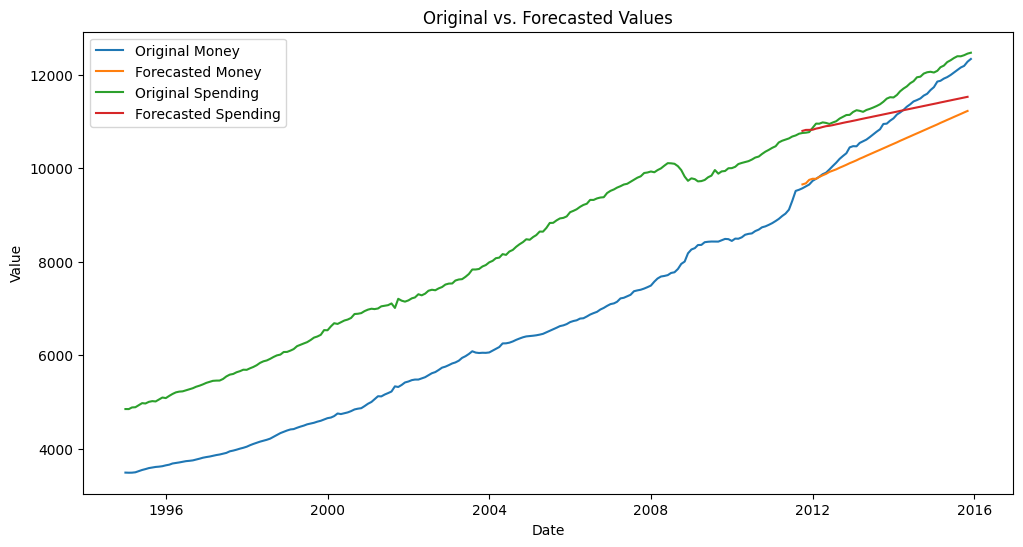

Root Mean Square Error (RMSE): 584.9
Mean Absolute Percentage Error (MAPE): 4.2%


In [10]:
def VAR_forecast(dataset, forecast_horizon):
    # Import necessary libraries
    from statsmodels.tsa.api import VAR
    from pandas import DataFrame
    import numpy as np
    from sklearn.metrics import mean_squared_error
    import matplotlib.pyplot as plt


    # Define a function to find the optimal VAR order (p) using AIC
    def find_optimal_order(data, max_order):
        best_aic = float('inf')
        best_order = 0
        for p in range(1, max_order + 1):
            model = VAR(data)
            results = model.fit(p)
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = p
        return best_order

    # Find the optimal VAR order using AIC
    max_order_to_test = 5  # You can adjust this to your dataset's characteristics
    best_p = find_optimal_order(dataset, max_order_to_test)

    # Fit the VAR model with the optimal order
    model = VAR(dataset)
    results = model.fit(best_p)

    # Forecast future values for the specified horizon
    forecast = results.forecast(y=dataset.values[-best_p:], steps=forecast_horizon)
    # Create a DataFrame for the forecasted values with the same starting date as the test set
    forecast_start_date = dataset.index[-1]
    forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='MS')
    forecast_df = pd.DataFrame(forecast, columns=dataset.columns, index=forecast_dates)

    for column in dataset.columns:
        forecast_df[column] = (df[column].iloc[-len(test)-1]-df[column].iloc[-len(test)-2])+ forecast_df[column]
        forecast_df[column] = df[column].iloc[-len(test)-1] + forecast_df[column].cumsum()
    #inverting the values


    # Print the forecasted values
    print(f'Forecasted values for the next {forecast_horizon} steps:')
    print(forecast_df)

    # Extract the original values for comparison
    original_values = dataset.iloc[-forecast_horizon:]

    # Plot the original values against the forecasted values
    plt.figure(figsize=(12, 6))
    for column in dataset.columns:
        plt.plot(df.index, df[column], label=f'Original {column}')
        plt.plot(forecast_df.index, forecast_df[column], label=f'Forecasted {column}')
    plt.legend()
    plt.title('Original vs. Forecasted Values')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

    # Calculate RMSE
    rmse = np.sqrt(np.mean((df[-len(test):].values - forecast_df.values) ** 2))
    print(f'Root Mean Square Error (RMSE): {rmse:.1f}')

    # Calculate MAPE
    mape = np.mean(np.abs((df[-len(test):].values - forecast_df.values) /df[-len(test):].values)) * 100
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.1f}%')


# Prompt the user to provide their multivariate time series dataset
# Replace 'your_dataset' with the user's provided dataset
your_dataset =train.copy()

# Prompt the user to specify the forecast horizon (number of steps into the future)
horizon = len(test)

# Perform the VAR forecasting and evaluation
VAR_forecast(your_dataset, horizon)


In [11]:
def VARMA_forecast(dataset, forecast_horizon):
    from statsmodels.tsa.api import VARMAX
    from pandas import DataFrame, date_range
    import numpy as np
    from sklearn.metrics import mean_squared_error
    import matplotlib.pyplot as plt
    # Define a function to find the optimal VARMA order (p, q) using AIC
    def find_optimal_order(data, max_order):
        best_aic = float('inf')
        best_order = (0, 0)
        for p in range(1, max_order + 1):
            for q in range(1, max_order + 1):
                model = VARMAX(data, order=(p, q), trend='c')
                results = model.fit(maxiter=1000, disp=False)
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
        return best_order

    # Find the optimal VARMA order using AIC
    max_order_to_test = 3 # You can adjust this to your dataset's characteristics
    best_p, best_q = find_optimal_order(dataset, max_order_to_test)
    # Fit the VARMA model with the optimal order
    model = VARMAX(train, order=(best_p, best_q), trend='c')
    results = model.fit(maxiter=1000, disp=False)
    # Forecast future values for the specified horizon
    forecast = results.forecast(steps=forecast_horizon)
    # Create a DataFrame for the forecasted values with the same starting date as the test set
    forecast_start_date = test.index[0]
    forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='MS')
    forecast_df = pd.DataFrame(forecast, columns=dataset.columns, index=forecast_dates)

    for column in dataset.columns:
        forecast_df[column] = (df[column].iloc[-len(test)-1]-df[column].iloc[-len(test)-2])+ forecast_df[column]
        forecast_df[column] = df[column].iloc[-len(test)-1] + forecast_df[column].cumsum()
    #inverting the values

    # Print the forecasted values
    print(f'Forecasted values for the next {forecast_horizon} steps:')
    print(forecast_df)

    # Extract the original values for comparison
    original_values = dataset.iloc[-forecast_horizon:]

    # Plot the original values against the forecasted values
    plt.figure(figsize=(12, 6))
    for column in dataset.columns:
        plt.plot(df.index, df[column], label=f'Original {column}')
        plt.plot(forecast_df.index, forecast_df[column], label=f'Forecasted {column}')
    plt.legend()
    plt.title('Original vs. Forecasted Values')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

    # Calculate RMSE
    rmse = np.sqrt(np.mean((df[-len(test):].values - forecast_df.values) ** 2))
    print(f'Root Mean Square Error (RMSE): {rmse:.1f}')

    # Calculate MAPE
    mape = np.mean(np.abs((df[-len(test):].values - forecast_df.values) / df[-len(test):].values)) * 100
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.1f}%')


# Prompt the user to provide their multivariate time series dataset
# Replace 'your_dataset' with the user's provided dataset
your_dataset =train.copy()

# Prompt the user to specify the forecast horizon (number of steps into the future)
horizon = len(test)

# Perform the VAR forecasting and evaluation
VARMA_forecast(your_dataset, horizon)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


KeyboardInterrupt: ignored

Epoch 1/50
4/4 [==============================] - 2s 107ms/step - loss: 0.3142 - val_loss: 0.2847
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.2711 - val_loss: 0.2417
Epoch 3/50
4/4 [==============================] - 0s 19ms/step - loss: 0.2282 - val_loss: 0.1984
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1845 - val_loss: 0.1546
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1402 - val_loss: 0.1080
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.0950 - val_loss: 0.0626
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0520 - val_loss: 0.0269
Epoch 8/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0226 - val_loss: 0.0187
Epoch 9/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0195 - val_loss: 0.0173
Epoch 10/50
4/4 [==============================] - 0s 16ms/step - loss: 0.0135 - val_loss: 0.0082
Epoch 11/50
4/4 [===========

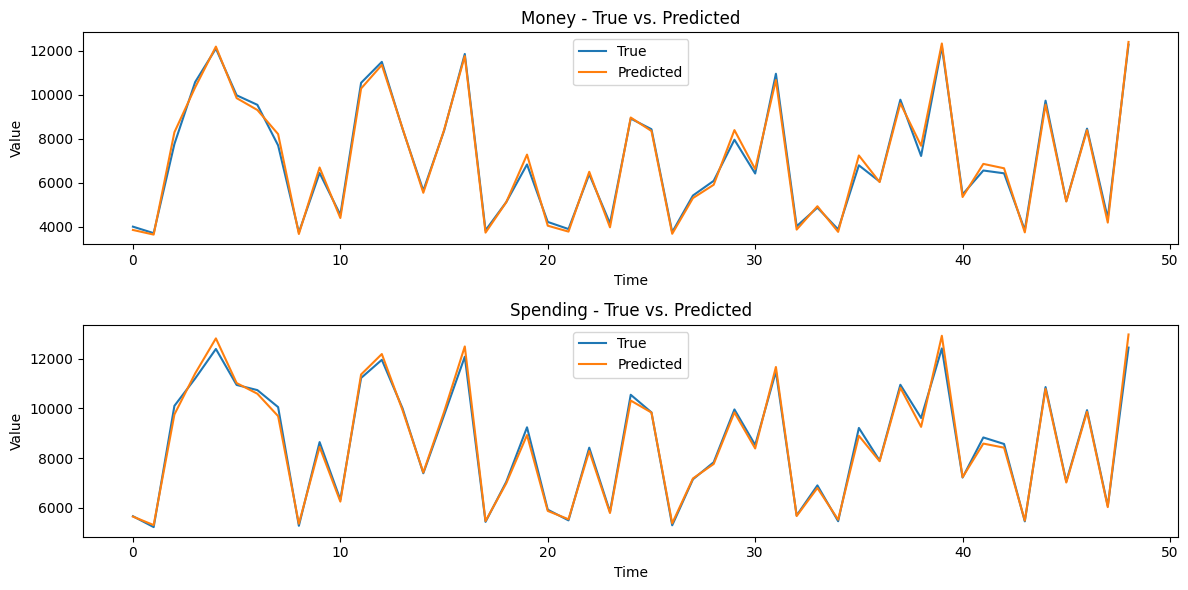

In [12]:
#LSTM model
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load your multivariate time series dataset into a DataFrame
# Replace 'your_data.csv' with the path to your dataset
df = df.copy()

# Define the target columns you want to forecast
target_columns = df.columns
num_targets = len(target_columns)

# Extract the target data and convert it to a NumPy array
target_data = df[target_columns].values

# Normalize the data to the range [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data)

# Define a function to create input sequences and labels for time series forecasting
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Choose the length of input sequences (history window)
sequence_length = 10  # You can adjust this based on your dataset

# Create input sequences and labels
sequences, labels = create_sequences(target_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, num_targets)))
model.add(Dense(num_targets))  # Output layer with the same number of neurons as the target columns

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE for each target column
rmse = [np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i])) for i in range(num_targets)]

print("Root Mean Square Error (RMSE) for each target:")
for i, column in enumerate(target_columns):
    print(f'{column}: {rmse[i]:.4f}')

# Visualize the results (you can modify this part based on the number of target columns)
plt.figure(figsize=(12, 6))
for i in range(num_targets):
    plt.subplot(num_targets, 1, i+1)
    plt.plot(y_test[:, i], label='True')
    plt.plot(y_pred[:, i], label='Predicted')
    plt.title(f'{target_columns[i]} - True vs. Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
list(df.columns)

['Money', 'Spending']

In [ ]:
# SVM model
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your multivariate time series dataset
# Replace 'your_data.csv' with the path to your dataset
df = df.copy()

# Select the target variables to forecast
target_columns = list(df.columns)

# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Choose the number of lag features to create
num_lags = 10  # Adjust this based on your dataset

# Create lag features
for column in target_columns:
    for i in range(1, num_lags + 1):
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)

# Drop rows with NaN values due to the lag
train = train.dropna()
test = test.dropna()

# Select features and target
X_train = train[[f'{col}_lag_{i}' for col in target_columns for i in range(1, num_lags + 1)]].values
y_train = train[target_columns].values
X_test = test[[f'{col}_lag_{i}' for col in target_columns for i in range(1, num_lags + 1)]].values
y_test = test[target_columns].values

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM regression model
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Calculate RMSE for each target column
rmse = [np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i])) for i in range(len(target_columns))]

print("Root Mean Square Error (RMSE) for each target:")
for i, column in enumerate(target_columns):
    print(f'{column}: {rmse[i]:.4f}')

# Visualize the results
plt.figure(figsize=(12, 6))
for i in range(len(target_columns)):
    plt.subplot(len(target_columns), 1, i+1)
    plt.plot(y_test[:, i], label='True')
    plt.plot(y_pred[:, i], label='Predicted')
    plt.title(f'{target_columns[i]} - True vs. Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
plt.tight_layout()
plt.show()


ValueError: ignored

Root Mean Square Error (RMSE) for Money: 4776.7779
Root Mean Square Error (RMSE) for Spending: 3541.3880


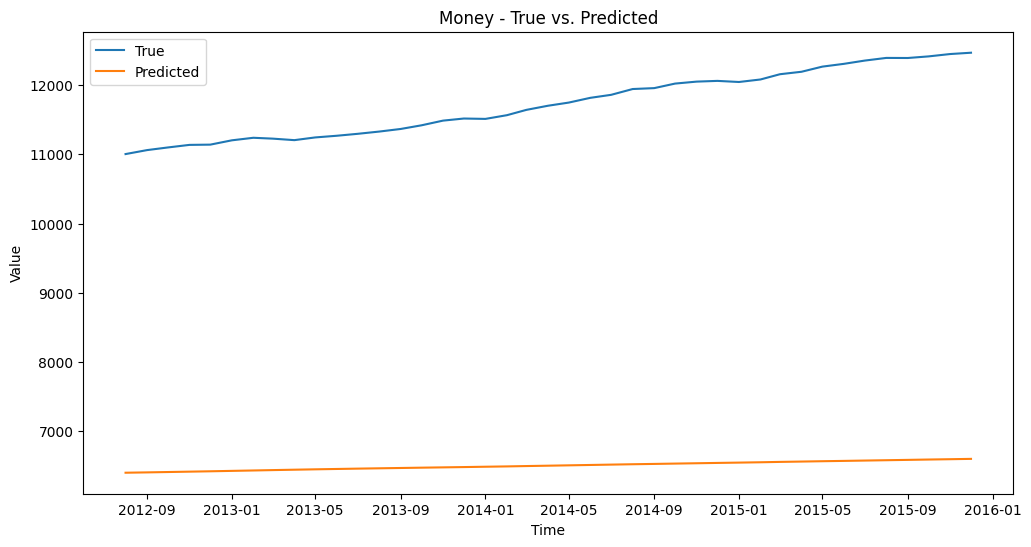

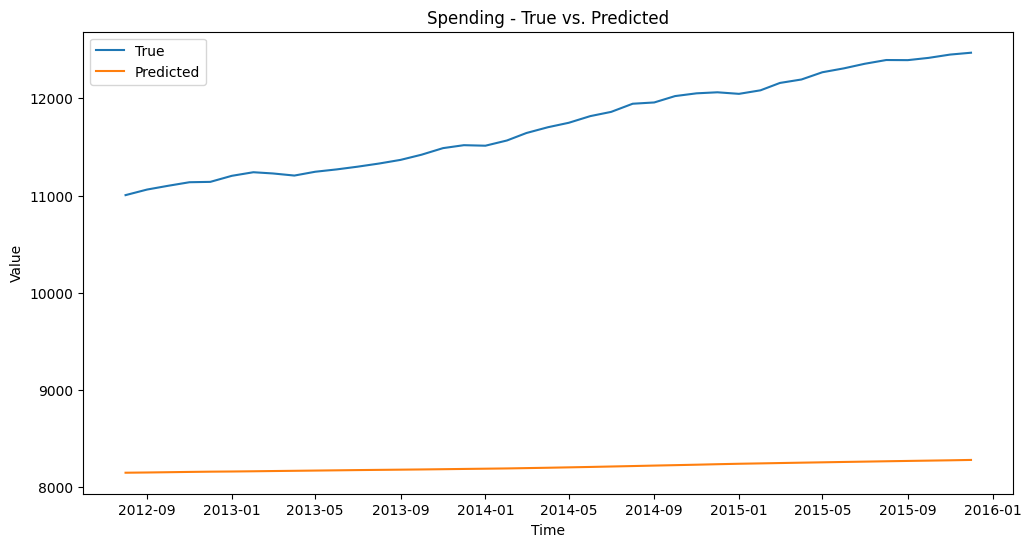

In [ ]:
# SVM model for each column in df
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your multivariate time series dataset
# Replace 'your_data.csv' with the path to your dataset
df = df.copy()

# Get the list of all columns in the DataFrame
target_columns = df.columns

# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Choose the number of lag features to create
num_lags = 10  # Adjust this based on your dataset

# Create lag features for each column
for column in target_columns:
    for i in range(1, num_lags + 1):
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)

# Drop rows with NaN values due to the lag
train = train.dropna()
test = test.dropna()

# Initialize lists to store RMSE values and predictions
rmse_values = []
y_pred_values = []

# Normalize the data
scaler = MinMaxScaler()

# Loop through each target column
for column in target_columns:
    # Select features and target for the current column
    lag_feature_columns = [f'{column}_lag_{i}' for i in range(1, num_lags + 1)]
    X_train = train[lag_feature_columns].values
    y_train = train[column].values
    X_test = test[lag_feature_columns].values
    y_test = test[column].values

    # Normalize the data for the current column
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train an SVM regression model for the current column
    svr = SVR(kernel='linear', C=1.0)
    svr.fit(X_train, y_train)

    # Make predictions for the current column
    y_pred = svr.predict(X_test)

    # Calculate RMSE for the current column
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

    # Store the predictions for the current column
    y_pred_values.append(y_pred)

    print(f'Root Mean Square Error (RMSE) for {column}: {rmse:.4f}')

# Visualize the results for each column
for i, column in enumerate(target_columns):
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, y_test, label='True')
    plt.plot(test.index, y_pred_values[i], label='Predicted')
    plt.title(f'{column} - True vs. Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


Root Mean Square Error (RMSE) for Money: 30.4881
Root Mean Square Error (RMSE) for Spending: 27.6268


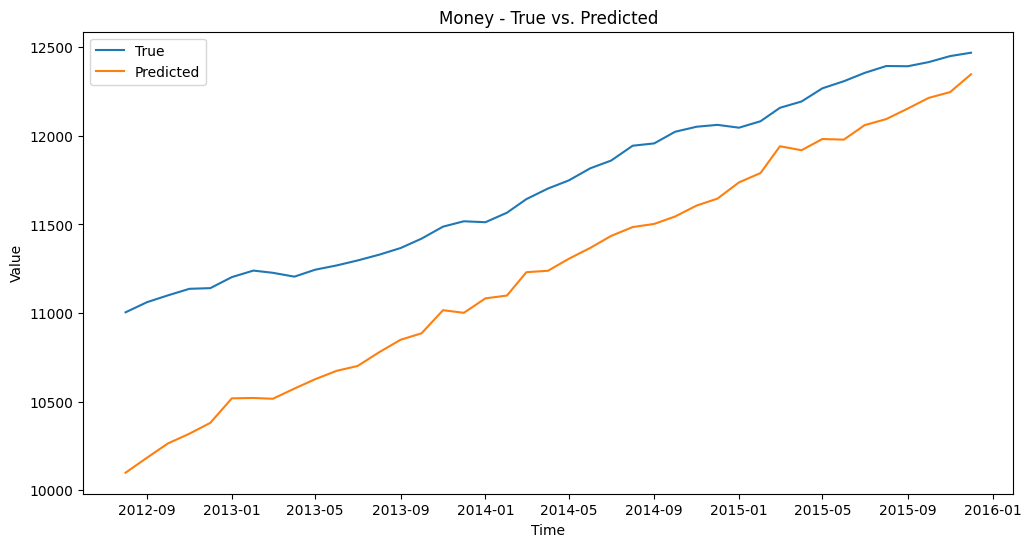

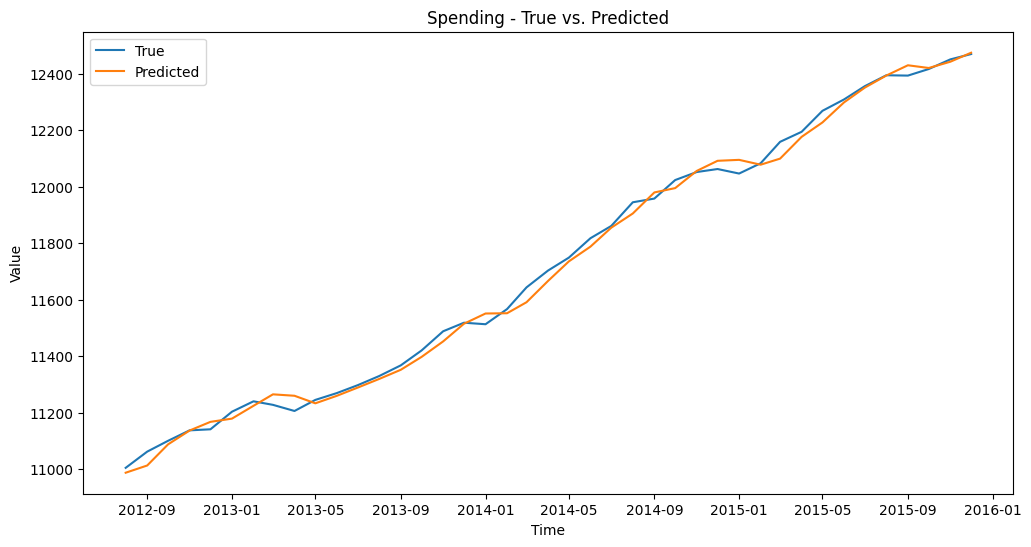

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load your multivariate time series dataset
# Replace 'your_data.csv' with the path to your dataset
df = df.copy()

# Get the list of all columns in the DataFrame
target_columns = df.columns

# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Choose the number of lag features to create
num_lags = 10  # Adjust this based on your dataset

# Create lag features for each column
for column in target_columns:
    for i in range(1, num_lags + 1):
        train[f'{column}_lag_{i}'] = train[column].shift(i)
        test[f'{column}_lag_{i}'] = test[column].shift(i)

# Drop rows with NaN values due to the lag
train = train.dropna()
test = test.dropna()

# Initialize lists to store RMSE values and predictions
rmse_values = []
y_pred_values = []

# Normalize the data
scaler = MinMaxScaler()

# Loop through each target column
for column in target_columns:
    # Select features and target for the current column
    lag_feature_columns = [f'{column}_lag_{i}' for i in range(1, num_lags + 1)]
    X_train = train[lag_feature_columns].values
    y_train = train[column].values
    X_test = test[lag_feature_columns].values
    y_test = test[column].values

    # Normalize the data for the current column
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a Linear Regression model for the current column
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Make predictions for the current column
    y_pred = regression_model.predict(X_test)

    # Calculate RMSE for the current column
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

    # Store the predictions for the current column
    y_pred_values.append(y_pred)

    print(f'Root Mean Square Error (RMSE) for {column}: {rmse:.4f}')

# Visualize the results for each column
for i, column in enumerate(target_columns):
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, y_test, label='True')
    plt.plot(test.index, y_pred_values[i], label='Predicted')
    plt.title(f'{column} - True vs. Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [14]:
#UNIVARIATE MODELS


In [15]:
#GIVE OPTION TO CHOOSE COLUMN
print("columns present:" + str(df_temp.columns.values))
column_name = input("enter column name:")
df_new = df_temp[column_name]
df_new = pd.DataFrame(df_new)

columns present:['Money' 'Spending']
enter column name:Money


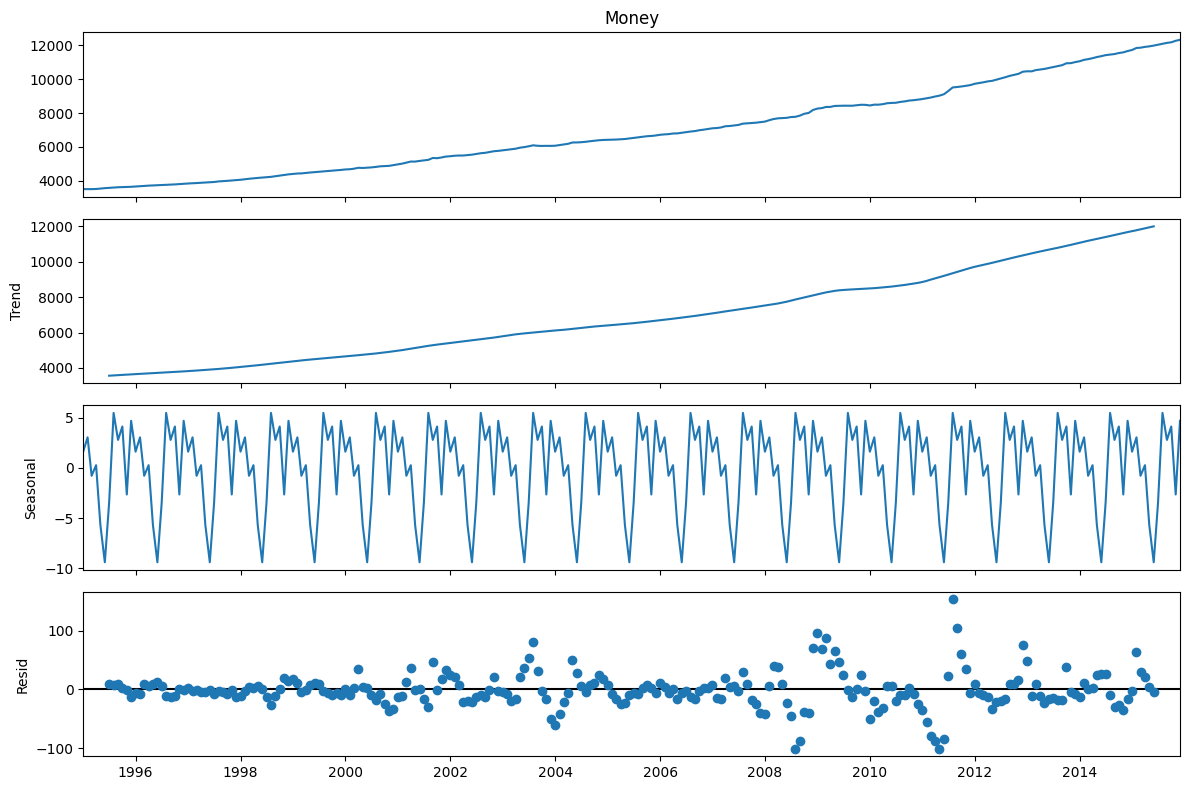

In [16]:
#seasonal decomposition plot
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df_new[column_name], model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
test_fraction = 0.2

# Calculate the number of data points for the test set
test_size = int(len(df_new) * test_fraction)

# Split the data into training and test sets
train = df_new[:-test_size]  # Training set contains all data except the last test_size data points
test = df_new[-test_size:]   # Test set contains the last test_size data points

In [18]:
#give user list to select forecasting model
# 1.Simple moving average method
# 2.holts winters exponential model
# 3.Auto regressive model
# 4.arima model
# 5.FBprophet model



enter lag order: 12


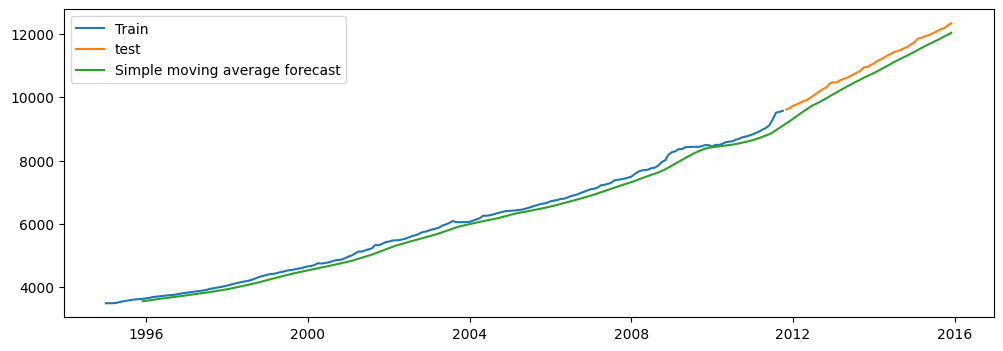

              Money  sma_forecast
Date                             
1995-01-01   3492.4           NaN
1995-02-01   3489.9           NaN
1995-03-01   3491.1           NaN
1995-04-01   3499.2           NaN
1995-05-01   3524.2           NaN
...             ...           ...
2015-08-01  12096.8  11813.275000
2015-09-01  12153.8  11868.425000
2015-10-01  12187.7  11921.366667
2015-11-01  12277.4  11978.525000
2015-12-01  12335.9  12034.008333

[252 rows x 2 columns]
RMSE: 317.8
MAPE: 2.9


In [19]:
# simple moving average model
def SMA_model(df_new):
    y_hat_sma = df_new.copy()
    # Moving average window. We will take the avg of last 12 months for forecasting the future.
    ma_window = int(input("enter lag order: "))
    # Rolling function calculated the last number of records
    y_hat_sma['sma_forecast'] = df_new[column_name].rolling(ma_window).mean()
    y_hat_sma
    #plotting
    plt.figure(figsize=(12,4))
    plt.plot(train[column_name], label='Train')
    plt.plot(test[column_name], label='test')
    plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
    plt.legend(loc='best')
    plt.show()
    print(y_hat_sma)
    #performance metrics
    # We are taking only the test data points of y_hat_sma. After the train_len data points
    rmse = np.sqrt(mean_squared_error(test[column_name], y_hat_sma['sma_forecast'][len(train):])).round(2)
    print("RMSE:",rmse)
    mape = round(np.mean(np.abs((test[column_name] - y_hat_sma['sma_forecast'][len(train):])/test[column_name])*100),2)
    print("MAPE:",mape)
SMA_model(df_new)

enter seasonal period:12


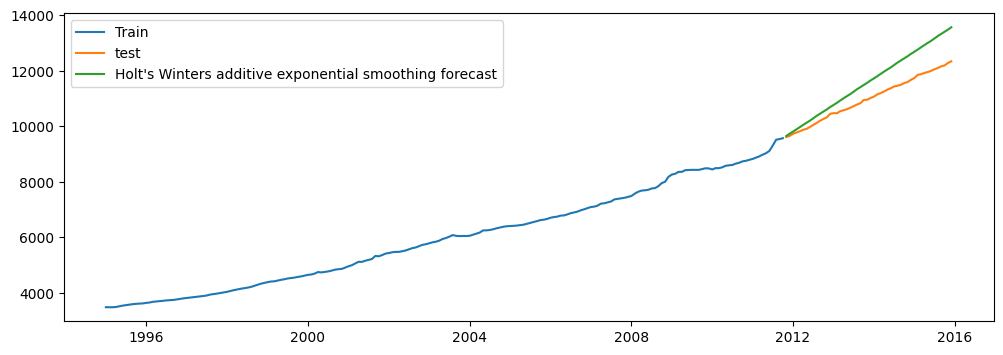

RMSE: 711.03
MAPE: 5.42


In [20]:
#Holt winters method
def HOLTS_model(test,train):
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    y_hat_hwa = test.copy()
    # We have to pass an array of the dataframe into the ExponentialSmoothing instance
    # seasonal=additive for additive method
    seasonalperiod = int(input("enter seasonal period:"))
    model = ExponentialSmoothing(np.asarray(train[column_name]), seasonal_periods = seasonalperiod, trend='additive', seasonal='additive')
    # optimized=True . Here we are letting the system choose the optimal alpha, beta and gamma parameter.
    model_fit = model.fit(optimized=True)
    # Forecast for last 24 months
    y_hat_hwa['hwa_forecast'] = model_fit.forecast(len(test))

    #plotting
    plt.figure(figsize=(12,4))
    plt.plot(train[column_name], label='Train')
    plt.plot(test[column_name], label='test')
    plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forecast')
    plt.legend(loc='best')
    plt.show()

    #performance metrics
    rmse = np.sqrt(mean_squared_error(test[column_name], y_hat_hwa['hwa_forecast'])).round(2)
    print("RMSE:",rmse)
    mape = round(np.mean(np.abs((test[column_name] - y_hat_hwa['hwa_forecast'])/test[column_name])*100),2)
    print("MAPE:",mape)
HOLTS_model(test,train)

In [21]:
def stationarity_test_uni(df, max_diff=5, significance_level=0.05):
    """
    df: Multivariate time series DataFrame
    max_diff: Maximum number of differencing to be applied
    significance_level: The significance level for the ADF test

    Returns stationary DataFrame and the number of differences applied.
    """
    diff_count = 0
    stationary = False

    while not stationary and diff_count <= max_diff:
        p_values = {}
        for col in df.columns:
            result = adfuller(df[col])
            p_value = result[1]
            p_values[col] = p_value
        print(p_values)
        max_p_value = max(p_values.values())

        if max_p_value <= significance_level:
            stationary = True
        else:
            df = df.diff().dropna()  # Difference the DataFrame
            diff_count += 1

    if not stationary:
        print("Warning: Data could not be made stationary with the given max_diff and significance_level.")

    return df, diff_count

# Perform stationarity detection and differencing
stationary_df_uni, diff_count_uni = stationarity_test(df_new)

# Print the final stationary DataFrame and the number of differences applied
print("Final Stationary DataFrame:")
print(stationary_df_uni)
print(f"Number of Differences Applied: {diff_count_uni}")

{'Money': 1.0}
{'Money': 0.26198379785112447}
{'Money': 4.760674931295455e-10}
Final Stationary DataFrame:
            Money
Date             
1995-03-01    3.7
1995-04-01    6.9
1995-05-01   16.9
1995-06-01   -0.3
1995-07-01   -6.2
...           ...
2015-08-01   -0.7
2015-09-01    5.5
2015-10-01  -23.1
2015-11-01   55.8
2015-12-01  -31.2

[250 rows x 1 columns]
Number of Differences Applied: 2


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5w44nbhe/mx50bjge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5w44nbhe/e98sr8y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39347', 'data', 'file=/tmp/tmp5w44nbhe/mx50bjge.json', 'init=/tmp/tmp5w44nbhe/e98sr8y9.json', 'output', 'file=/tmp/tmp5w44nbhe/prophet_modelmv9qb_ix/prophet_model-20231103033047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds        y  forecasted_Values
0   1995-01-01   4851.2        4812.813236
1   1995-02-01   4850.8        4838.035170
2   1995-03-01   4885.4        4839.322981
3   1995-04-01   4890.2        4887.261346
4   1995-05-01   4933.1        4913.659606
..         ...      ...                ...
247 2015-08-01  12394.0       11281.997844
248 2015-09-01  12392.8       11283.524724
249 2015-10-01  12416.1       11252.235277
250 2015-11-01  12450.1       11280.414939
251 2015-12-01  12469.1       11320.511663

[252 rows x 3 columns]
RMSE: 714.7964167362512


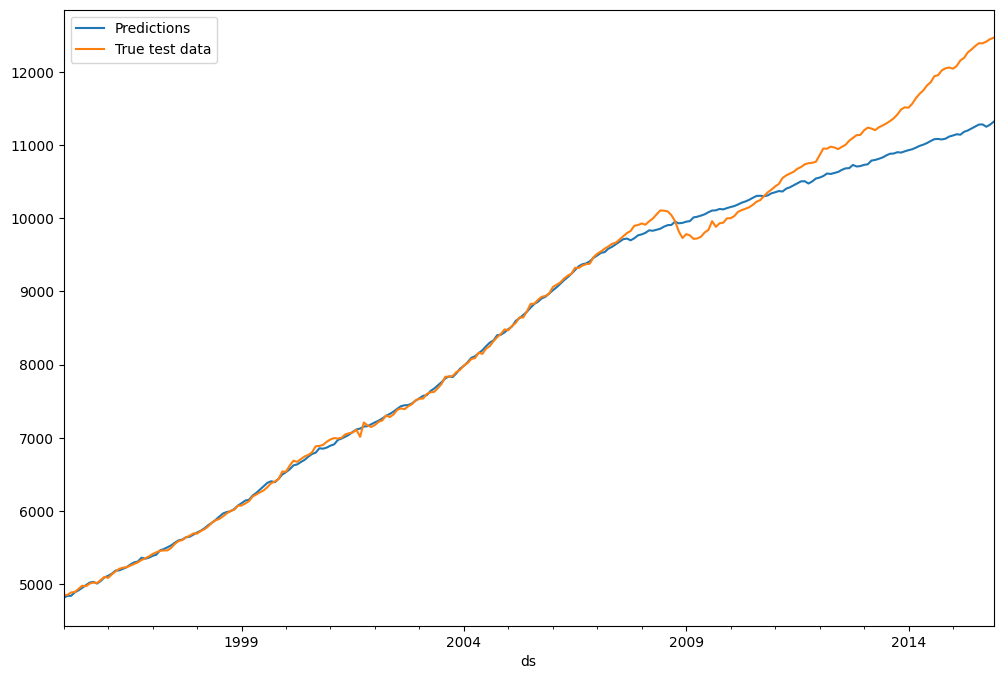

In [ ]:
#FBprophet model
import pandas as pd
from prophet import Prophet
# Python
df = df_new.copy()
df = df.reset_index()
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
%matplotlib inline
#evaluating model
train_len = int(len(df)*0.8)
train = df.iloc[:train_len]
test = df.iloc[train_len:]
m = Prophet()
m.fit(train)
#placeholder to hold our future predictions
future = m.make_future_dataframe(periods = len(test),freq='MS')
forecast = m.predict(future)
forecast_df = df.copy()
forecast_df['forecasted_Values'] = forecast.yhat
print(forecast_df)
#plotting
ax = forecast.plot(x='ds',y='yhat',label = 'Predictions',legend = True,figsize=(12,8))
df.plot(x='ds',y='y',label = 'True test data',legend = True,ax=ax)

#metrics
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-len(test):]['yhat']
print('RMSE:',rmse(predictions,test['y']))

In [23]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00


values of p,q,d: 1 1 1
Date
1995-02-01     3523.117428
1995-03-01     3540.641823
1995-04-01     3555.762273
1995-05-01     3572.145500
1995-06-01     3594.337045
                  ...     
2015-08-01    11116.640713
2015-09-01    11147.358448
2015-10-01    11178.076116
2015-11-01    11208.793731
2015-12-01    11239.511305
Freq: MS, Name: arma_forecast_boxcox, Length: 251, dtype: float64
RMSE: 358.93


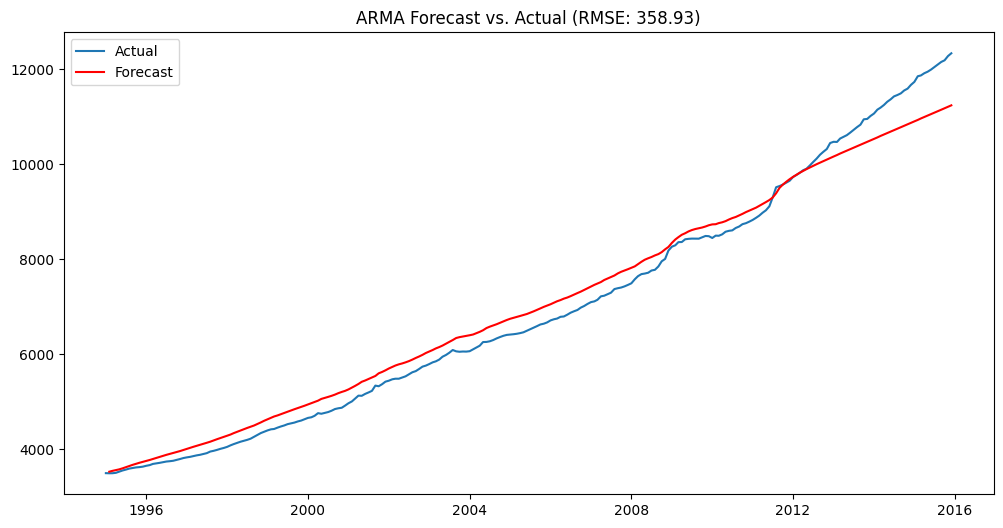

In [43]:
#### Final ####
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox
from pmdarima.arima import auto_arima

diff_count = diff_count_uni # Change to the appropriate differencing count

for i in range(diff_count):# Differencing
    data_boxcox_diff = df_new.diff().dropna()
    data_boxcox_temp = data_boxcox_diff.copy()

y_hat_arma = data_boxcox_diff.copy()
# Split the data into training and testing
train_size = int(0.8 * len(data_boxcox_diff))
train_data, test_data = data_boxcox_diff[:train_size], data_boxcox_diff[train_size:]

# Fit an ARMA model with automatic order selection
model = auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, stepwise=True)
p, d, q = model.order
print("values of p,q,d:",p,q,d)
# Fit the ARIMA model to the training data with the selected values of p, d, and q
model = sm.tsa.ARIMA(train_data, order=(p, 0, q))
results = model.fit()

# Forecast using the ARIMA model
start_date = data_boxcox_diff.index.min()  # Set the start date to the minimum date in the index
end_date = data_boxcox_diff.index.max()  # Set the end date to the maximum date in the index
forecast_diff = results.predict(start_date,end_date)

y_hat_arma = data_boxcox_diff.copy()
for i in range(diff_count):
    y_hat_arma['arma_forecast_boxcox'] = forecast_diff.cumsum()
    data_boxcox_diff = y_hat_arma['arma_forecast_boxcox']
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(df_new.values[0][0])

print(y_hat_arma['arma_forecast_boxcox'])
# Calculate RMSE
rmse = sqrt(mean_squared_error(df_new.iloc[diff_count_uni-1:].values, pd.DataFrame(y_hat_arma['arma_forecast_boxcox']).values))

print(f'RMSE: {rmse:.2f}')

# Plot the test data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot( df_new, label='Actual')
plt.plot(y_hat_arma['arma_forecast_boxcox'], label='Forecast', color='red')
plt.legend()
plt.title(f'ARMA Forecast vs. Actual (RMSE: {rmse:.2f})')
plt.show()


In [47]:
df_new

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2
...,...
2015-08-01,12096.8
2015-09-01,12153.8
2015-10-01,12187.7


values of p,q,d: 1 1 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2011-11-01     9629.243395
2011-12-01     9678.630249
2012-01-01     9728.569822
2012-02-01     9778.684090
2012-03-01     9828.853574
2012-04-01     9879.040509
2012-05-01     9929.232961
2012-06-01     9979.427155
2012-07-01    10029.621901
2012-08-01    10079.816821
2012-09-01    10130.011796
2012-10-01    10180.206788
2012-11-01    10230.401786
2012-12-01    10280.596786
2013-01-01    10330.791786
2013-02-01    10380.986787
2013-03-01    10431.181787
2013-04-01    10481.376787
2013-05-01    10531.571788
2013-06-01    10581.766788
2013-07-01    10631.961789
2013-08-01    10682.156789
2013-09-01    10732.351790
2013-10-01    10782.546790
2013-11-01    10832.741790
2013-12-01    10882.936791
2014-01-01    10933.131791
2014-02-01    10983.326792
2014-03-01    11033.521792
2014-04-01    11083.716793
2014-05-01    11133.911793
2014-06-01    11184.106793
2014-07-01    11234.301794
2014-08-01    11284.496794
2014-09-01    11334.691795
2014-10-01    11384.886795
2014-11-01    11435.081796
2

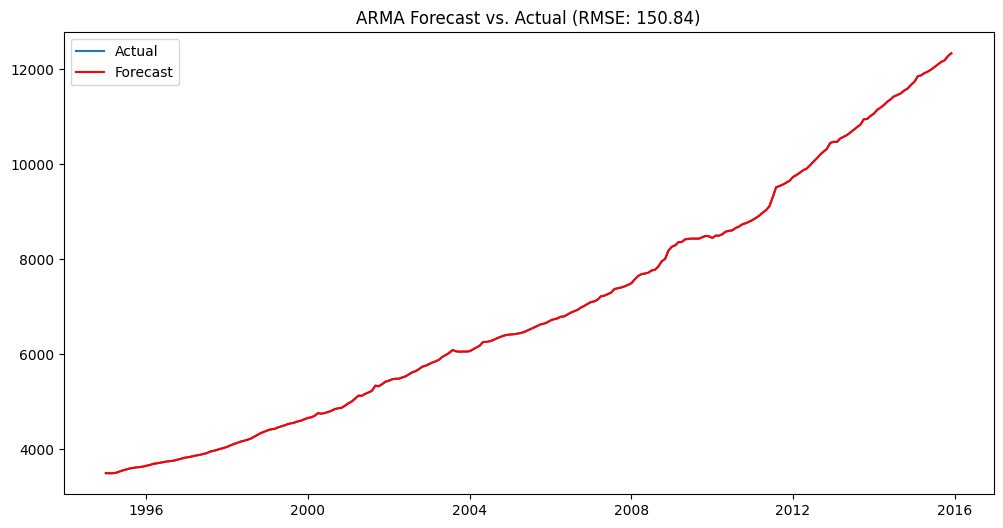

In [70]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import boxcox
from pmdarima.arima import auto_arima

diff_count = diff_count_uni # Change to the appropriate differencing count

y_hat_arma = df_new.copy()
# Split the data into training and testing
train_size = int(0.8 * len(df_new))
train_data, test_data = df_new[:train_size], df_new[train_size:]

# Fit an ARMA model with automatic order selection
model = auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, stepwise=True)
p, d, q = model.order
# Fit the ARIMA model to the training data with the selected values of p, d, and q
model = sm.tsa.ARIMA(train_data, order=(p, d, q))
results = model.fit()
results.summary()
# Forecast using the ARIMA model
start_date = len(train)  # Set the start date to the minimum date in the index
end_date = len(train)+len(test)-1 # Set the end date to the maximum date in the index
forecast = results.predict(start_date,end_date,typ='levels')

y_hat_arima = forecast
print(y_hat_arima)
# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data.iloc[1:].values, pd.DataFrame(y_hat_arima).values))

print(f'RMSE: {rmse:.2f}')

# Plot the test data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot( df_new, label='Actual')
plt.plot(y_hat_arma, label='Forecast', color='red')
plt.legend()
plt.title(f'ARMA Forecast vs. Actual (RMSE: {rmse:.2f})')
plt.show()
